In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Testing Different Orientations of the ModelNet10

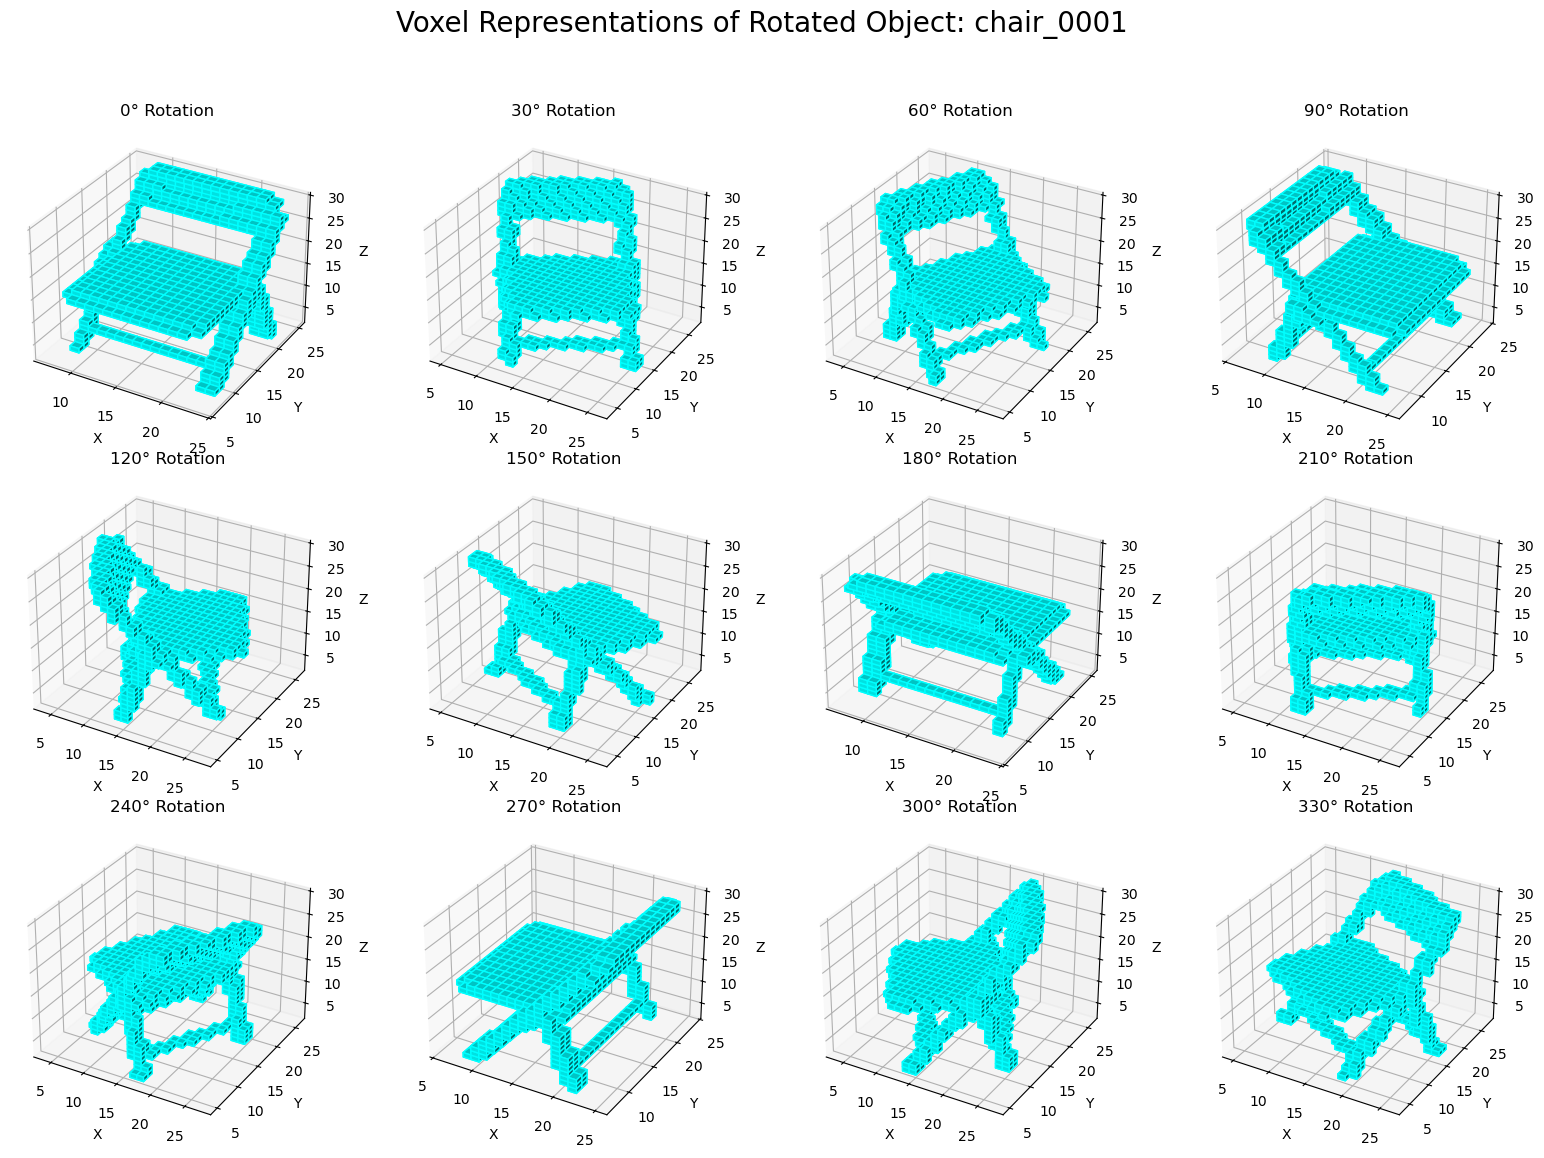

In [9]:

BASE_NAME = 'chair_0001'
DATA_DIR = 'C:/Users/utente/Desktop/PCL/pcl_classification/data/modelnet10/VoxelizedOriented/chair/train/'
# Create a list to hold the loaded point clouds and their titles
voxel_grids = []
titles = []

# Loop through the 12 expected rotations
for i in range(0, 12):
    angle = i * 30
    file_name = f"{BASE_NAME}_rot{i:02d}_{angle}deg.npy"
    file_path = os.path.join(DATA_DIR, file_name)

    if os.path.exists(file_path):
        grid = np.load(file_path).squeeze()
        voxel_grids.append(grid)
        titles.append(f"{angle}° Rotation")
    else:
        print(f"Warning: File not found - {file_path}")
if not voxel_grids:
    print("Error: No voxel grid files were found. Please check DATA_DIR and BASE_NAME.")
else:
    fig, axes = plt.subplots(3, 4, figsize=(16, 12), subplot_kw={'projection': '3d'})
    fig.suptitle(f'Voxel Representations of Rotated Object: {BASE_NAME}', fontsize=20)
    axes = axes.ravel()
    for i, grid in enumerate(voxel_grids):
        ax = axes[i]
        ax.voxels(grid, facecolors='cyan', edgecolor='cyan') # 'k' is black for edges

        ax.set_title(titles[i])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    for i in range(len(voxel_grids), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Testing Different Orientations of ModelNet40

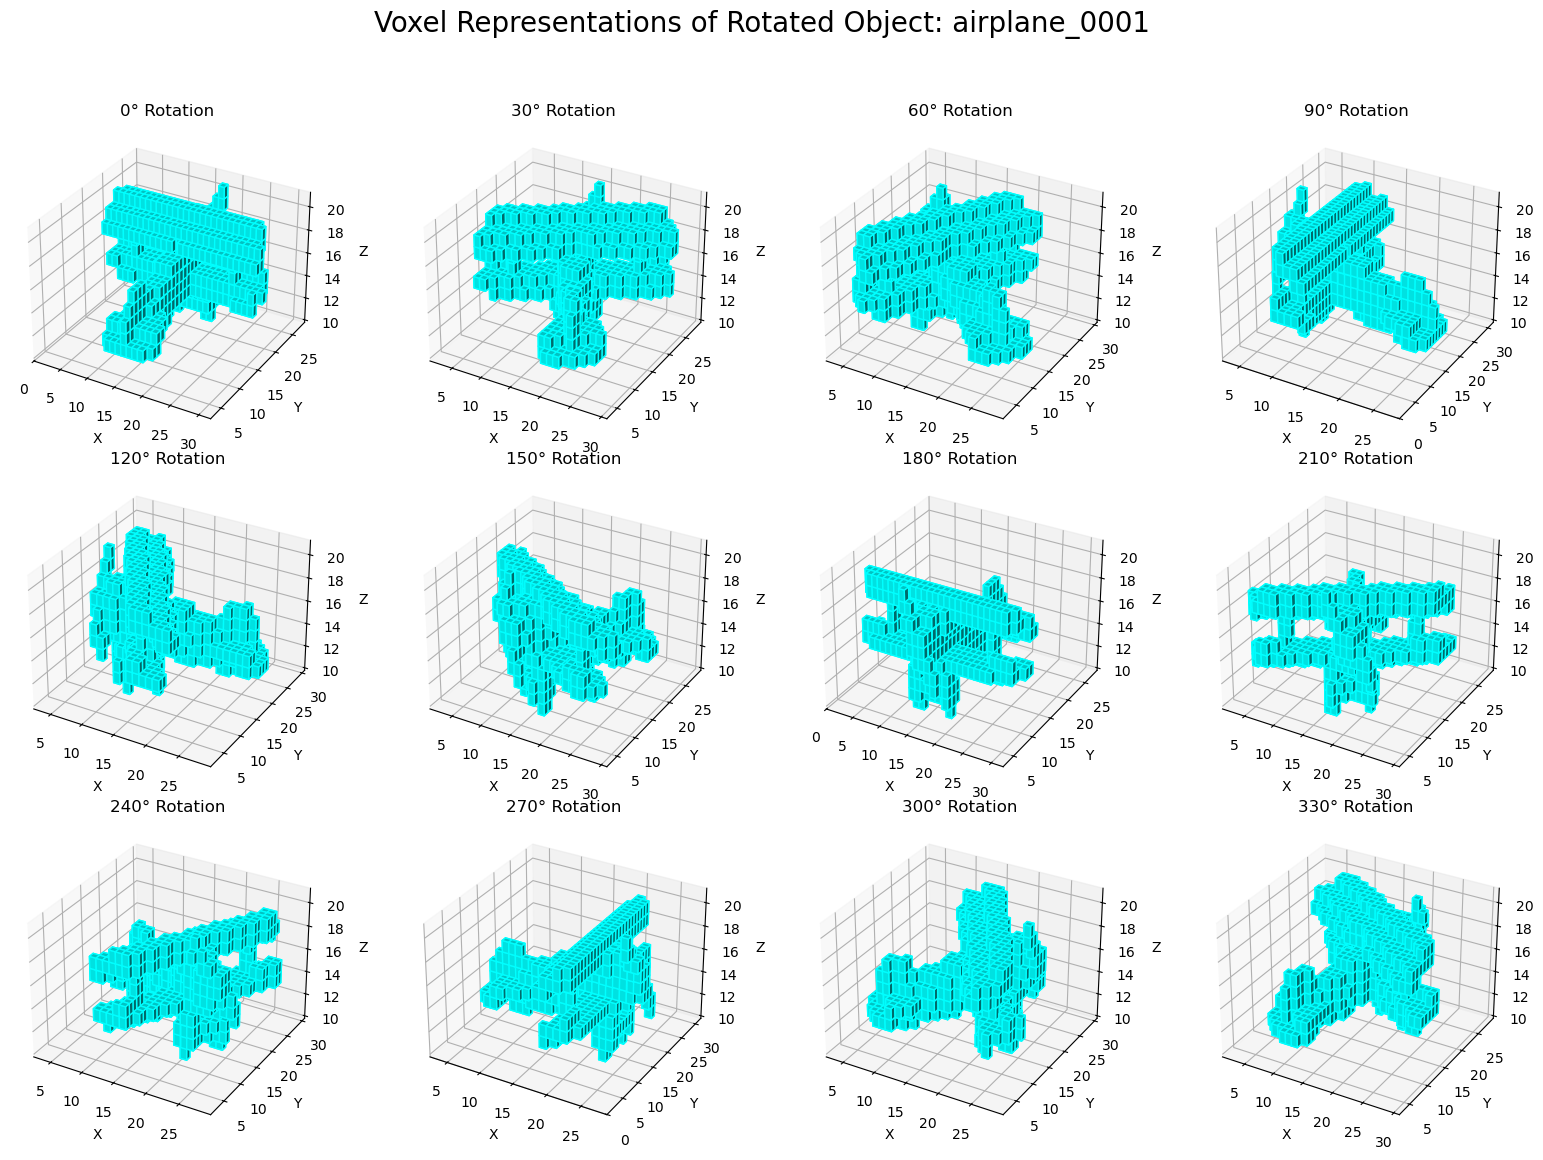

In [11]:

BASE_NAME = 'airplane_0001'
DATA_DIR = 'C:/Users/utente/Desktop/PCL/pcl_classification/data/modelnet40/VoxelizedOriented/airplane/train/'
# Create a list to hold the loaded point clouds and their titles
voxel_grids = []
titles = []

# Loop through the 12 expected rotations
for i in range(0, 12):
    angle = i * 30
    file_name = f"{BASE_NAME}_rot{i:02d}_{angle}deg.npy"
    file_path = os.path.join(DATA_DIR, file_name)

    if os.path.exists(file_path):
        grid = np.load(file_path).squeeze()
        voxel_grids.append(grid)
        titles.append(f"{angle}° Rotation")
    else:
        print(f"Warning: File not found - {file_path}")
if not voxel_grids:
    print("Error: No voxel grid files were found. Please check DATA_DIR and BASE_NAME.")
else:
    fig, axes = plt.subplots(3, 4, figsize=(16, 12), subplot_kw={'projection': '3d'})
    fig.suptitle(f'Voxel Representations of Rotated Object: {BASE_NAME}', fontsize=20)
    axes = axes.ravel()
    for i, grid in enumerate(voxel_grids):
        ax = axes[i]
        ax.voxels(grid, facecolors='cyan', edgecolor='cyan') # 'k' is black for edges

        ax.set_title(titles[i])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    for i in range(len(voxel_grids), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# PointNet Data presentation

In [12]:
def pointcloud_to_occupancy(points, voxel_size, grid_min=None, grid_max=None):
    """
    Convert point cloud to binary occupancy grid.
    """
    if grid_min is None:
        grid_min = np.min(points, axis=0)
    if grid_max is None:
        grid_max = np.max(points, axis=0)
    dims = np.ceil((np.array(grid_max) - np.array(grid_min)) / voxel_size).astype(int)
    occupancy = np.zeros(dims, dtype=np.uint8)
    indices = np.floor((points - grid_min) / voxel_size).astype(int)
    mask = np.all((indices >= 0) & (indices < dims), axis=1)
    indices = indices[mask]
    occupancy[indices[:, 0], indices[:, 1], indices[:, 2]] = 1
    return occupancy

# Voxel presentation
def voxel_view(occupancy_matrix, title='voxelized view'):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.voxels(occupancy_matrix, facecolors='blue', edgecolor='blue')
  ax.set_title(title)
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_zlabel("Z")
  ax.set_aspect('equal') # Equal aspect ratio
  plt.show()

Occupancy shape: (194, 158, 61)
Occupied voxels: 1991


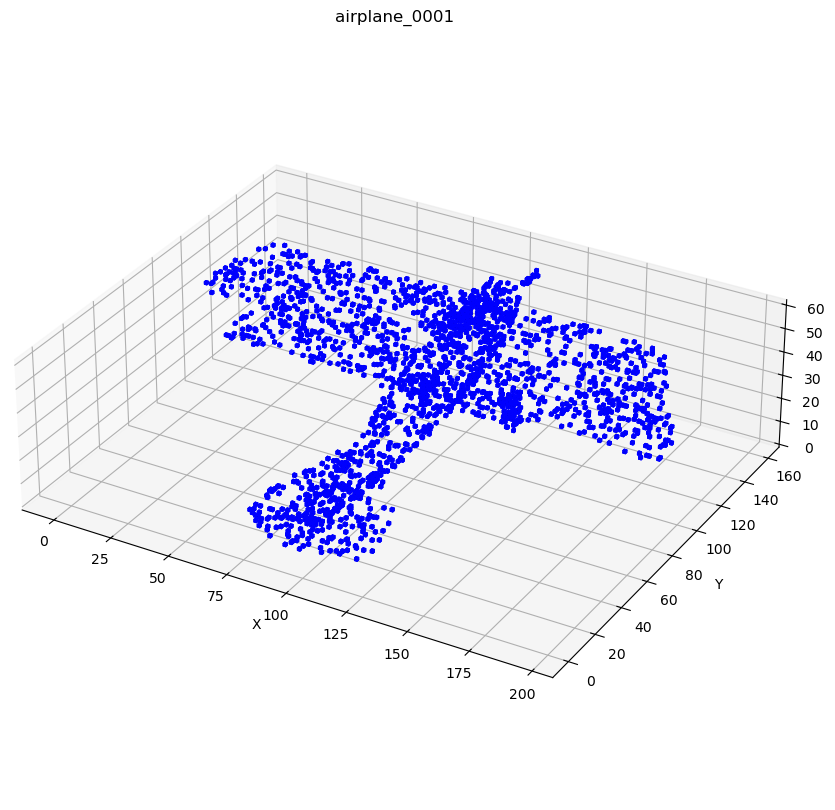

In [13]:

obj = np.load('C:/Users/utente/Desktop/PCL/pcl_classification/data/modelnet40/PointClouds/airplane/train/airplane_0001.npy')
occupancy_train_data = pointcloud_to_occupancy(obj, .01)
print("Occupancy shape:", occupancy_train_data.shape)
print("Occupied voxels:", np.sum(occupancy_train_data))
voxel_view(occupancy_train_data, 'airplane_0001')

Occupancy shape: (82, 93, 146)
Occupied voxels: 1891


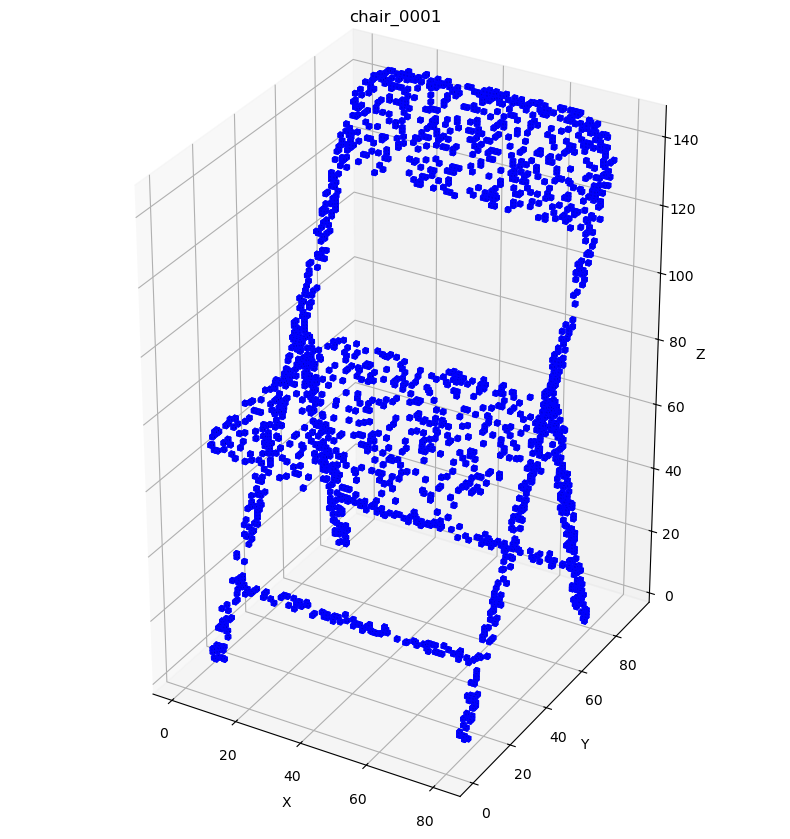

In [15]:
obj = np.load('C:/Users/utente/Desktop/PCL/pcl_classification/data/modelnet10/PointClouds/chair/train/chair_0001.npy')
occupancy_train_data = pointcloud_to_occupancy(obj, .01)
print("Occupancy shape:", occupancy_train_data.shape)
print("Occupied voxels:", np.sum(occupancy_train_data))
voxel_view(occupancy_train_data, 'chair_0001')